<a href="https://colab.research.google.com/github/villemarc1/Image-Classifier/blob/master/Trabalho_Titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Data Preparation


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('titanic(2).csv')
df.head()

Saving titanic(2).csv to titanic(2) (2).csv


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Verificar Valores ausentes 

In [31]:
df.apply(lambda x: sum(x.isnull()),axis=0)



Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [32]:
df = df.replace('male', 1)
df = df.replace('female', 2)
df = df.drop(columns='Name')
df.dtypes

#A função describe() fornece contagem, média, desvio padrão (STD), mínimo, quartis e máximo
df.describe()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,1.354002,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,0.478480,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,1.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,2.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.32920


Aqui estão algumas inferências, você pode desenhar olhando para a saída de função describe():

Quanto aos valores faltantes , na linha count mostra também que não temos nenhum, todos iguais (887.00000)

Podemos também verificar que cerca de 38% dos sobreviventes ,52% tinhas esposas e filhos (Siblings/Spouses Aboard ) e 38% eram pais e filhos (Parents/Children Aboard).



In [40]:
df_ALL = df
dfData = df.drop(columns='Survived')
dfTarget = df.drop(columns='Pclass')
dfTarget = dfTarget.drop(columns='Sex')
dfTarget = dfTarget.drop(columns='Age')
dfTarget = dfTarget.drop(columns='Fare')
dfTarget = dfTarget.drop(columns='Siblings/Spouses Aboard')
dfTarget = dfTarget.drop(columns='Parents/Children Aboard')

df_ALL = df_ALL.values
data = dfData.values
target = dfTarget.values

df_ALL



array([[ 0.    ,  3.    ,  1.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    ,  2.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    ,  2.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  3.    ,  2.    , ...,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  3.    ,  1.    , ...,  0.    ,  0.    ,  7.75  ]])

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = LinearRegression().fit(data, target)

print(model.intercept_)
print(model.coef_)

y_predicted = model.predict(data)

[0.31658719]
[[-1.80033840e-01  5.07735561e-01 -6.19716867e-03 -5.02913457e-02
  -1.92834129e-02  4.03397591e-04]]


In [42]:
rmse = mean_squared_error(target, y_predicted)
r2 = r2_score(target, y_predicted)
print(rmse)
print(r2)
print('Mean Absolute Error:', mean_absolute_error(target, y_predicted))



0.14273729855549933
0.39749298971397784
Mean Absolute Error: 0.29382952404269735


In [43]:
dfResult = pd.DataFrame(data = np.c_[df_ALL, y_predicted], columns = ['Survived', 'Pclass',	'Sex',	'Age',	'Siblings/Spouses Aboard',	'Parents/Children Aboard',	'Fare','predicted'])

dfResult


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,predicted
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,0.100517
1,1.0,1.0,2.0,38.0,1.0,0.0,71.2833,0.894996
2,1.0,3.0,2.0,26.0,0.0,0.0,7.9250,0.634027
3,1.0,1.0,2.0,35.0,1.0,0.0,53.1000,0.906253
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,0.070568
...,...,...,...,...,...,...,...,...
882,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,0.302176
883,1.0,1.0,2.0,19.0,0.0,0.0,30.0000,1.046380
884,0.0,3.0,2.0,7.0,1.0,2.0,23.4500,0.669178
885,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.495264


In [59]:

import seaborn as sns # Gráficos #
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)





In [57]:

dfResult[dfResult['Survived']==1]
dfResult[dfResult['Survived']==1]['predicted']


1      0.894996
2      0.634027
3      0.906253
8      0.590558
9      0.847069
         ...   
871    0.701914
875    0.819245
876    0.808266
883    1.046380
885    0.495264
Name: predicted, Length: 342, dtype: float64

(array([ 5., 21., 15., 10.,  4.,  9., 18., 17.,  9.,  9., 22., 39., 24.,
        32., 24., 28., 16., 25., 12.,  3.]),
 array([0.00859599, 0.06525599, 0.12191599, 0.17857599, 0.23523598,
        0.29189598, 0.34855598, 0.40521597, 0.46187597, 0.51853597,
        0.57519597, 0.63185596, 0.68851596, 0.74517596, 0.80183595,
        0.85849595, 0.91515595, 0.97181595, 1.02847594, 1.08513594,
        1.14179594]),
 <a list of 20 Patch objects>)

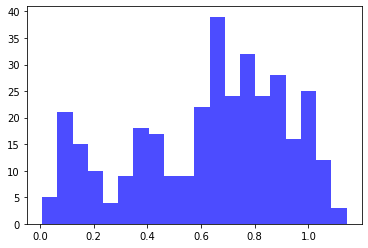

In [61]:

plt.hist(dfResult[dfResult['Survived']==1]['predicted'],color="blue",alpha=0.7, bins=20, density=False)



Repostas

O modelo de regressão nao é o mais ideal para esses tipos de análise, alem das  considerações vistas na função df.describe(), percebi tambem que pessoas de classes mais baixas, tem menor chances de sobreviver.
